In [ ]:
!pip install opencv-python

# New Section

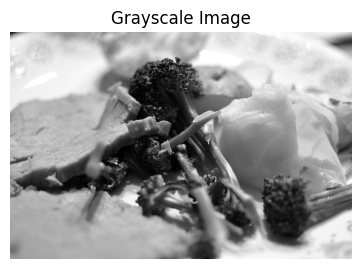

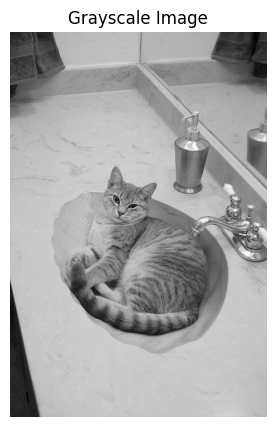

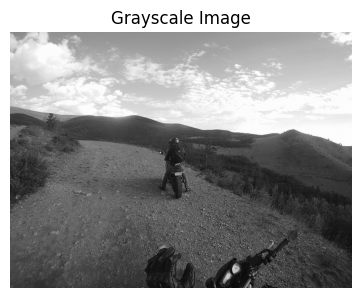

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random

# Set dataset path
dataset_path = '/content/drive/MyDrive/Object Recognition Dataset/val2017'
# Get list of image paths
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path) if fname.endswith('.jpg')]

# Function to show images with Matplotlib
def show_images(images, titles, cols=3, figsize=(15, 5)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Grayscale Conversion
def grayscale_conversion(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:
        # Load image
        img = cv2.imread(img_path)

        # Convert to Grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display grayscale images for selected samples
        if img_path in random_images:
            show_images([gray], ["Grayscale Image"])

grayscale_conversion(image_paths)


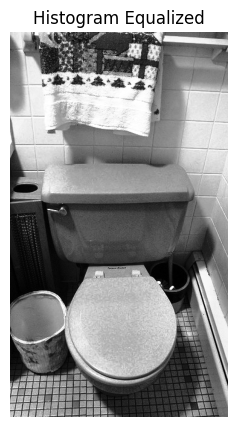

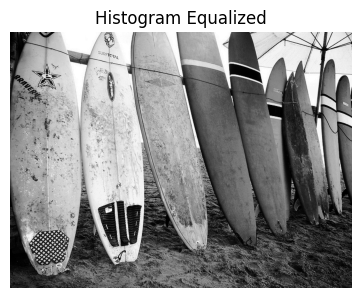

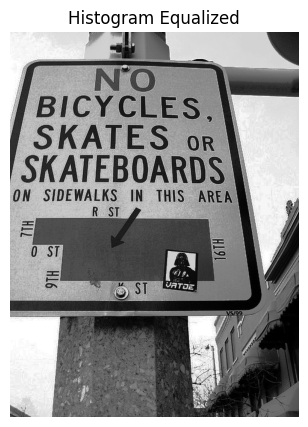

In [ ]:
# Histogram Equalization
def histogram_equalization(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:

        img = cv2.imread(img_path)

        # Convert to Grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Histogram Equalization
        hist_eq = cv2.equalizeHist(gray)

        # Display histogram equalized images for selected samples
        if img_path in random_images:
            show_images([hist_eq], ["Histogram Equalized"])


histogram_equalization(image_paths)


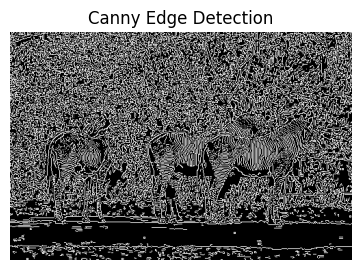

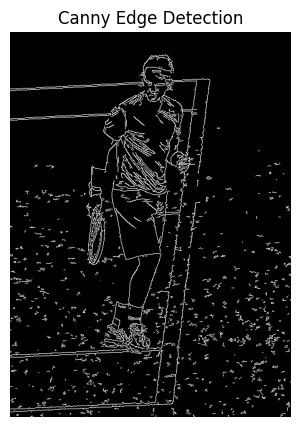

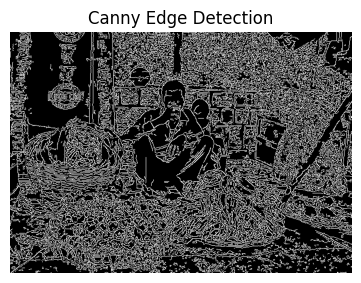

In [ ]:
# Canny Edge Detection
def canny_edge_detection(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:

        img = cv2.imread(img_path)


        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Canny Edge Detection
        edges = cv2.Canny(gray, 100, 200)

        # Display edges for selected samples
        if img_path in random_images:
            show_images([edges], ["Canny Edge Detection"])


canny_edge_detection(image_paths)
#Detects edges in the grayscale image.


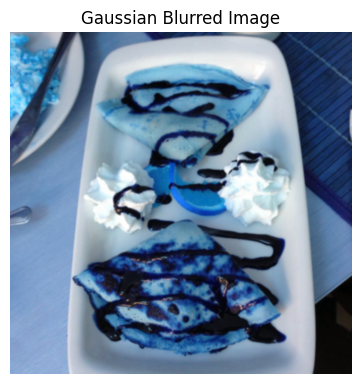

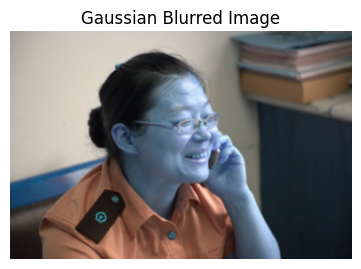

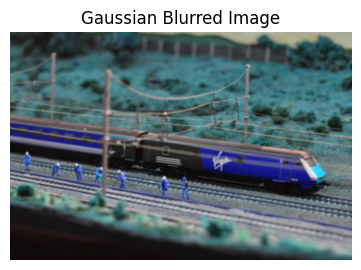

In [ ]:
# Gaussian Blur
def gaussian_blur(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:

        img = cv2.imread(img_path)

        # Apply Gaussian Blur with a kernel size of (5, 5)
        blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

        # Display blurred images
        if img_path in random_images:
            show_images([blurred_img], ["Gaussian Blurred Image"])


gaussian_blur(image_paths)
#Gaussian blur to reduce noise and smooth the image.

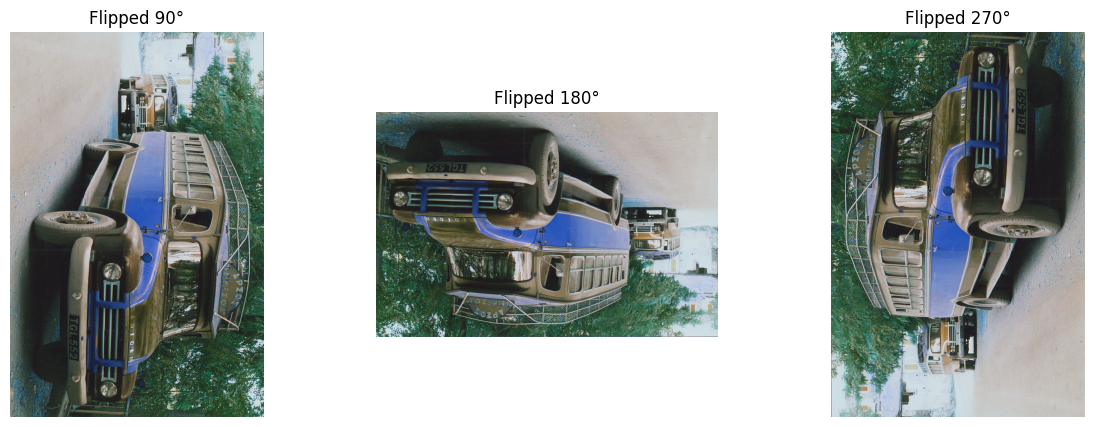

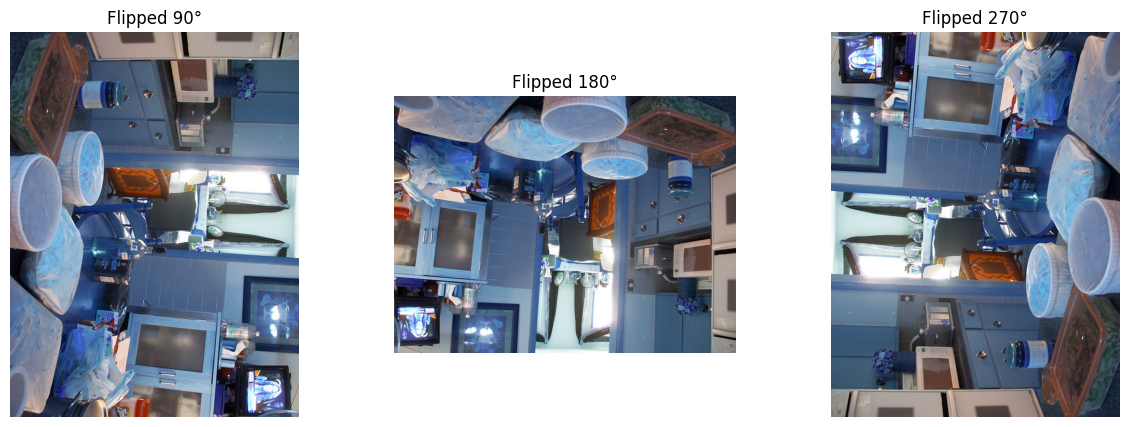

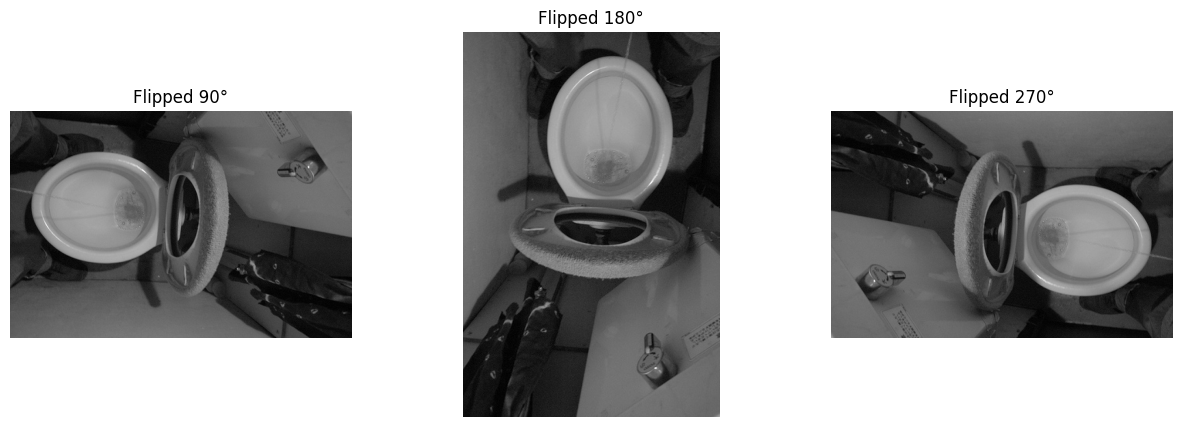

In [ ]:
# Image Flipping (Rotation)
def image_flipping(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:

        img = cv2.imread(img_path)

        # Flip images by 90°, 180°, and 270° angles
        flipped_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        flipped_180 = cv2.rotate(img, cv2.ROTATE_180)
        flipped_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

        # Display flipped images for selected samples
        if img_path in random_images:
            show_images([flipped_90, flipped_180, flipped_270], ["Flipped 90°", "Flipped 180°", "Flipped 270°"])


image_flipping(image_paths)


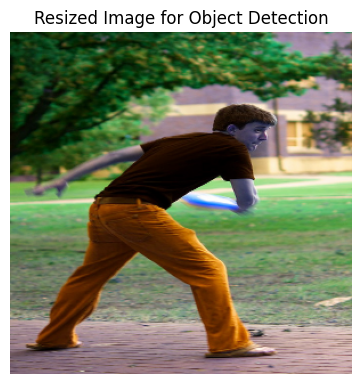

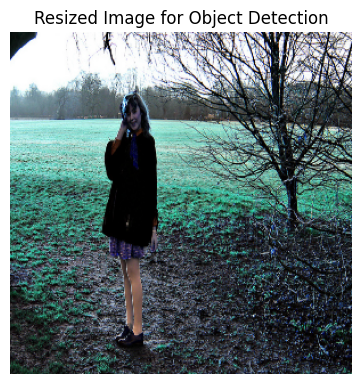

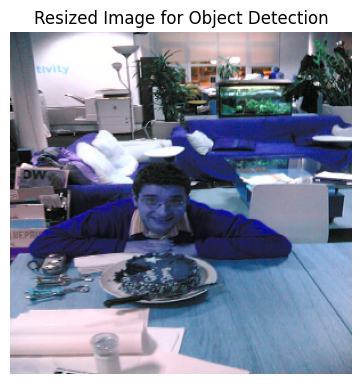

In [ ]:
# Image Resizing (for Object Detection)
def resize_image(image_paths):
    random_images = random.sample(image_paths, 3)
    for img_path in image_paths:

        img = cv2.imread(img_path)

        # Resize image to 300x300
        resized_img = cv2.resize(img, (300, 300))

        # Display resized images
        if img_path in random_images:
            show_images([resized_img], ["Resized Image for Object Detection"])


resize_image(image_paths)


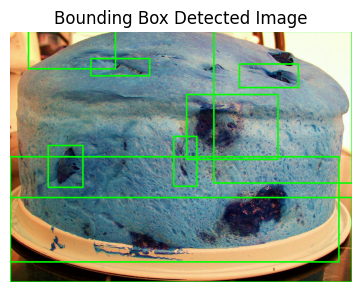

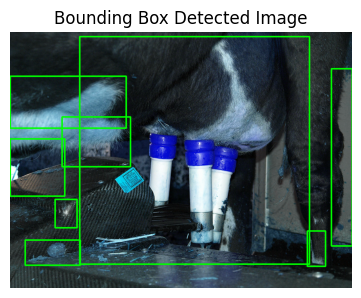

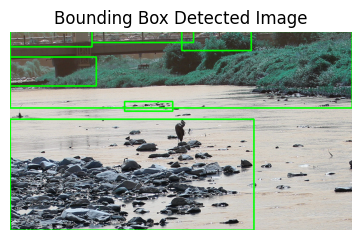

In [ ]:
import numpy as np

# Edge-Based Bounding Box using Sobel Edge Detection
def bounding_box_detection_sobel(image_paths):
    random_images = random.sample(image_paths, 3)  # Select 3 random images for display
    for img_path in image_paths:
        # Load image
        img = cv2.imread(img_path)

        # Convert to Grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply GaussianBlur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply Sobel Edge Detection (Sobel X and Sobel Y)
        sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the gradient magnitude
        sobel_mag = cv2.magnitude(sobel_x, sobel_y)

        # Threshold the magnitude to get binary edges
        _, edges = cv2.threshold(sobel_mag, 50, 255, cv2.THRESH_BINARY)

        # Find contours from the binary edge image
        contours, _ = cv2.findContours(np.uint8(edges), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours based on area and aspect ratio (to avoid small noise and irrelevant shapes)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 500:  # Filter out small contours based on area (you can adjust this threshold)
                # Get bounding box for the contour
                x, y, w, h = cv2.boundingRect(contour)
                # Draw bounding box around the detected object
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with bounding boxes for selected samples
        if img_path in random_images:
            show_images([img], ["Bounding Box Detected Image"])

# Assuming image_paths is already defined and contains the paths to your images
bounding_box_detection_sobel(image_paths)